# **Exporting Dataset**

In [41]:
#importing pandas library to import dataset
import pandas as pd

In [42]:
#importing dataset and naming it data
data = pd.read_csv('california_housing_train.csv')

# **EDA (Exploritory Data Analysis)**

In [43]:
#First 5 rows of dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [44]:
#Dataset Rows and columns
data.shape

(17000, 9)

In [45]:
#Datatype Check (we have to convert all to (int) if not by default)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [46]:
#Null Value check (0 is prefered)
data.isnull().sum()

#Fill missing values:
data['Age']=data['Age'].fillna(data['Age'].mean())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

# **Data Preprocessing (chagings in dataset if required)**

In [47]:
#data preprocessing
from sklearn.preprocessing import LabelEncoder #Encodes labels with a value between 0 and 1.
from sklearn.preprocessing import OneHotEncoder #Encodes categorical featuresnumeric arrays, useful for algorithms that need binary encoding.
from sklearn.preprocessing import StandardScaler #often used to normalize input data for better model performance.

#We Will Use labelencoder
le = LabelEncoder()
for col in data.columns:
  data[col] = le.fit_transform(data[col])

data['Sex'] = OneHotEncoder().fit_transform(data['Sex'].values.reshape(-1, 1)).toarray()
data['Embarked'] = OneHotEncoder().fit_transform(data['Embarked'].values.reshape(-1, 1)).toarray()

#feature scaling:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data['Age']=ss.fit_transform(data[['Age']])
data['SibSp']=ss.fit_transform(data[['SibSp']])
data['Parch']=ss.fit_transform(data[['Parch']])

In [48]:
#check datatype if its converted to int (we can trail models only if all are int or float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   longitude           17000 non-null  int64
 1   latitude            17000 non-null  int64
 2   housing_median_age  17000 non-null  int64
 3   total_rooms         17000 non-null  int64
 4   total_bedrooms      17000 non-null  int64
 5   population          17000 non-null  int64
 6   households          17000 non-null  int64
 7   median_income       17000 non-null  int64
 8   median_house_value  17000 non-null  int64
dtypes: int64(9)
memory usage: 1.2 MB


In [49]:
#Remove Unnamed:0 Column
#df.drop(columns=['Unnamed: 0'],inplace=True)

In [50]:
#value count plot
#df['TypeName'].value_counts().plot(kind='bar')

# **X Y Datasplit**

In [51]:
#median-house_value is our target

#X is for Features
X = data.drop('median_house_value',axis=1)
#Y is for Target
Y = data['median_house_value']


In [52]:
#Check X (target sould not be present )
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,826,165,14,4529,1258,972,471,539
1,825,186,18,5045,1605,1086,462,1106
2,824,115,16,526,173,291,116,781
3,823,110,13,1285,336,472,225,4336
4,823,103,19,1238,325,581,261,1291
...,...,...,...,...,...,...,...,...
16995,3,759,51,2000,393,864,368,2308
16996,2,770,35,2132,527,1151,464,2652
16997,1,836,16,2458,530,1201,455,3901
16998,1,833,18,2453,551,1255,477,1404


In [53]:
#lets Check Y (only target should be here)
Y

0        246
1        376
2        432
3        310
4        233
        ... 
16995    688
16996    365
16997    611
16998    433
16999    521
Name: median_house_value, Length: 17000, dtype: int64

# **Train Test Split**

In [54]:
#Now Will split data into 2 parts 80% for train 20% for test

#importing traintestsplit
from sklearn.model_selection import train_test_split

#Train test Split implementation
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

# **Models Implementation**


In [55]:
#we can choose any model we want
#some examples
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR


In [56]:
#linear regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

#lets check accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("R2 Score",r2_score(Y_test,y_pred))
print("MSE",mean_squared_error(Y_test,y_pred))
print("MAE",mean_absolute_error(Y_test,y_pred))

R2 Score 0.6516649344923611
MSE 352065.23824222735
MAE 465.5858445091481


In [57]:
#Decision tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
y_pred = dt.predict(X_test)

#lets check accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("R2 Score",r2_score(Y_test,y_pred))
print("MSE",mean_squared_error(Y_test,y_pred))
print("MAE",mean_absolute_error(Y_test,y_pred))

R2 Score 0.6939025107662226
MSE 309375.35764705885
MAE 367.4


In [58]:
#Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
y_pred = rfr.predict(X_test)

#lets check accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("R2 Score",r2_score(Y_test,y_pred))
print("MSE",mean_squared_error(Y_test,y_pred))
print("MAE",mean_absolute_error(Y_test,y_pred))

R2 Score 0.8452092590795104
MSE 156448.329428
MAE 272.0250882352941


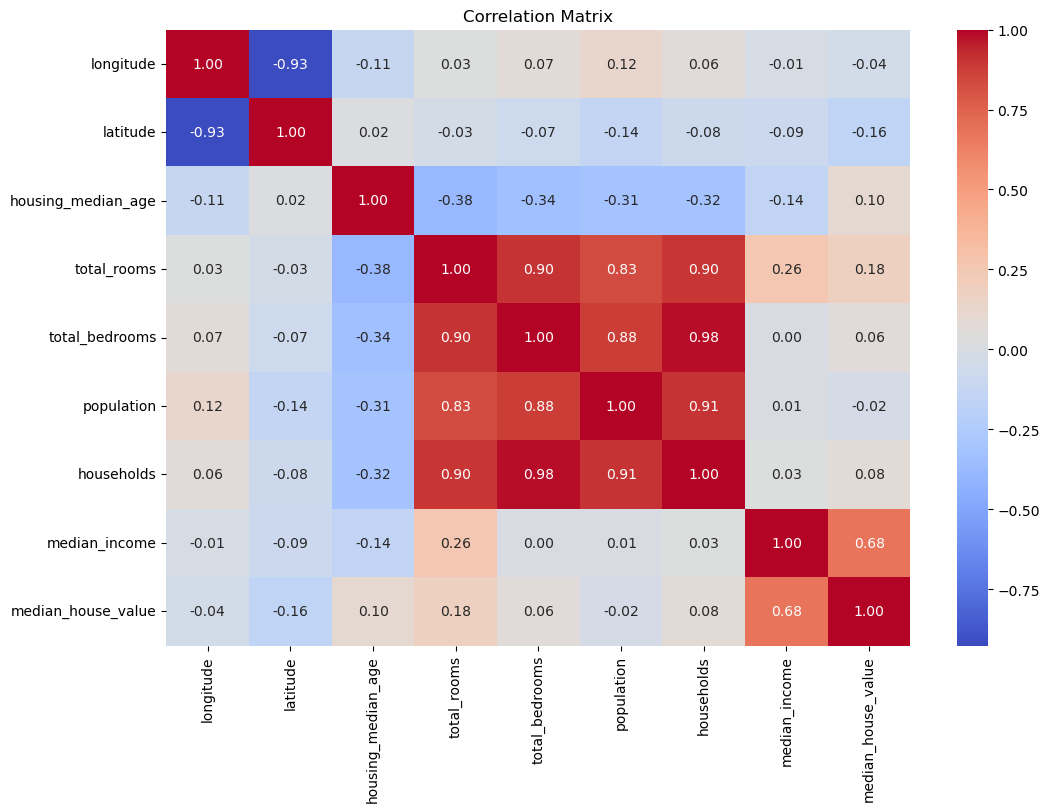

In [59]:
# Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Features most correlated with Target:
median_house_value    1.000000
median_income         0.679998
total_rooms           0.182244
housing_median_age    0.098803
households            0.082391
total_bedrooms        0.063628
population           -0.024268
longitude            -0.043735
latitude             -0.155605
Name: median_house_value, dtype: float64


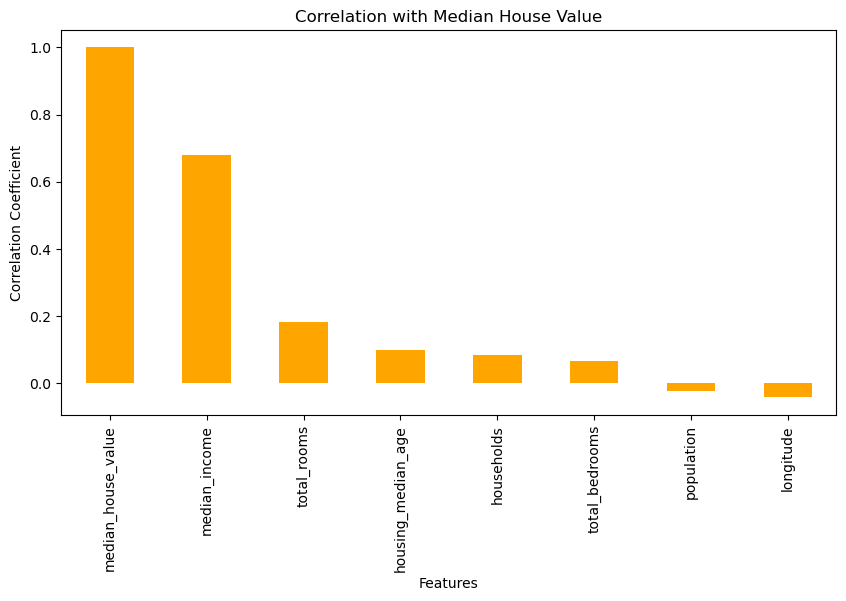

In [60]:
# Correlation with Target Variable
target_corr = corr_matrix['median_house_value'].sort_values(ascending=False)

# Display top correlations
print("Features most correlated with Target:")
print(target_corr)

# Plot top correlations
plt.figure(figsize=(10, 5))
target_corr[:-1].plot(kind='bar', color='orange')  # Exclude target itself
plt.title('Correlation with Median House Value')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


In [62]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Example for classification
y_pred = model.predict(X_test)  # Replace `model` with your actual classifier, e.g., `dt` or `rfr`

# Calculate metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')  # Use 'binary' for binary classification
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


NameError: name 'rft' is not defined